# Chapter-3 Processing, Wrangling, and Visualizing Data

+ Data collection: To understand different data retrieval mechanisms for different data types
+ Data description: To understand various attributes and properties of the data collected
+ Data wrangling: To prepare data for consumption in the modeling steps
+ Data visualization: To visualize different attributes for sharing results, better understanding, and so on

# Handling Comma Separated Value Files

This notebook showcases methods to extract data from CSVs:
+ csv containing delimiter separated values
+ csv containing tabular data

In [1]:
# import required libraries
import csv
import pandas as pd
from pprint import pprint

In [2]:
def print_basic_csv(file_name, delimiter=','):
    """This function extracts and prints csv content from given filename
       Details: https://docs.python.org/2/library/csv.html
    Args:
        file_name (str): file path to be read
        delimiter (str): delimiter used in csv. Default is comma (',')

    Returns:
        None

    """
    csv_rows = list()
    csv_attr_dict = dict()
    csv_reader = None

    # read csv
    csv_reader = csv.reader(open(file_name, 'r'), delimiter=delimiter)
        
    # iterate and extract data    
    for row in csv_reader:
        print(row)
        csv_rows.append(row)
    
    # prepare attribute lists
    for col in csv_rows[0]:
        csv_attr_dict[col]=list()
    
    # iterate and add data to attribute lists
    for row in csv_rows[1:]:
        csv_attr_dict['sno'].append(row[0])
        csv_attr_dict['fruit'].append(row[1])
        csv_attr_dict['color'].append(row[2])
        csv_attr_dict['price'].append(row[3])
    
    # print the result
    print("\n\n")
    print("CSV Attributes::")
    pprint(csv_attr_dict)
            


def print_tabular_data(file_name,delimiter=","):
    """This function extracts and prints tabular csv content from given filename
       Details: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html
    Args:
        file_name (str): file path to be read
        delimiter (str): delimiter used in csv. Default is comma ('\t')

    Returns:
        None

    """
    df = pd.read_csv(file_name,sep=delimiter)
    print(df)

## Parse using CSV module

The print_basic_csv() function takes the input file name along with delimiter as input parameters.

In [3]:
print_basic_csv(r'tabular_csv.csv')

['sno', 'fruit', 'color', 'price']
['1', 'apple', 'red', '110.85']
['2', 'banana', 'yellow', '50.12']
['3', 'mango', 'yellow', '70.29']
['4', 'orange', 'orange', '80.00']
['5', 'kiwi', 'green', '150.00']
['6', 'pineapple', 'yellow', '90.00']
['7', 'guava', 'green', '20.00']



CSV Attributes::
{'color': ['red', 'yellow', 'yellow', 'orange', 'green', 'yellow', 'green'],
 'fruit': ['apple', 'banana', 'mango', 'orange', 'kiwi', 'pineapple', 'guava'],
 'price': ['110.85', '50.12', '70.29', '80.00', '150.00', '90.00', '20.00'],
 'sno': ['1', '2', '3', '4', '5', '6', '7']}


The first output in the above cell shows the data in the csv as-is.
The second one is the parsed output showcasing the contents of the csv as key-value pairs

## Parse using pandas

The print_tabular_data() function takes the input file name along with delimiter as input parameters. It uses pandas to do the heavy lifting

In [4]:
print_tabular_data(r'tabular_csv.csv')

   sno      fruit   color   price
0    1      apple     red  110.85
1    2     banana  yellow   50.12
2    3      mango  yellow   70.29
3    4     orange  orange   80.00
4    5       kiwi   green  150.00
5    6  pineapple  yellow   90.00
6    7      guava   green   20.00


The output in the above cell shows how pandas reads a csv and prepares a tabular dataframe

## Data Wrangling
+ This notebook presents different data wrangling techniques used commonly

In [5]:
# import required libraries
import random
import datetime 
import numpy as np
import pandas as pd
from random import randrange
from sklearn import preprocessing

pd.options.mode.chained_assignment = None

In [6]:
def _random_date(start,date_count):
    """This function generates a random date based on params
    Args:
        start (date object): the base date
        date_count (int): number of dates to be generated
    Returns:
        list of random dates

    """
    current = start
    while date_count > 0:
        curr = current + datetime.timedelta(days=randrange(42))
        yield curr
        date_count-=1


def generate_sample_data(row_count=100):
    """This function generates a random transaction dataset
    Args:
        row_count (int): number of rows for the dataframe
    Returns:
        a pandas dataframe

    """
    
    # sentinels
    startDate = datetime.datetime(2016, 1, 1,13)
    serial_number_sentinel = 1000
    user_id_sentinel = 5001
    product_id_sentinel = 101
    price_sentinel = 2000
    
    
    # base list of attributes
    data_dict = {
    'Serial No': np.arange(row_count)+serial_number_sentinel,
    'Date': np.random.permutation(pd.to_datetime([x.strftime("%d-%m-%Y") 
                                                    for x in _random_date(startDate,
                                                                          row_count)]).date
                                  ),
    'User ID': np.random.permutation(np.random.randint(0,
                                                       row_count,
                                                       size=int(row_count/10)) + user_id_sentinel).tolist()*10,
    'Product ID': np.random.permutation(np.random.randint(0,
                                                          row_count,
                                                          size=int(row_count/10))+ product_id_sentinel).tolist()*10 ,
    'Quantity Purchased': np.random.permutation(np.random.randint(1,
                                                                  42,
                                                                  size=row_count)),
    'Price': np.round(np.abs(np.random.randn(row_count)+1)*price_sentinel,
                      decimals=2),
    'User Type':np.random.permutation([chr(random.randrange(97, 97 + 3 + 1)) 
                                            for i in range(row_count)])
    }
    
    # introduce missing values
    for index in range(int(np.sqrt(row_count))): 
        data_dict['Price'][np.argmax(data_dict['Price'] == random.choice(data_dict['Price']))] = np.nan
        data_dict['User Type'][np.argmax(data_dict['User Type'] == random.choice(data_dict['User Type']))] = np.nan
        data_dict['Date'][np.argmax(data_dict['Date'] == random.choice(data_dict['Date']))] = np.nan
        data_dict['Product ID'][np.argmax(data_dict['Product ID'] == random.choice(data_dict['Product ID']))] = 0
        data_dict['Serial No'][np.argmax(data_dict['Serial No'] == random.choice(data_dict['Serial No']))] = -1
        data_dict['User ID'][np.argmax(data_dict['User ID'] == random.choice(data_dict['User ID']))] = -101
        
    
    # create data frame
    df = pd.DataFrame(data_dict)
    
    return df
    

def describe_dataframe(df=pd.DataFrame()):
    """This function generates descriptive stats of a dataframe
    Args:
        df (dataframe): the dataframe to be analyzed
    Returns:
        None

    """
    print("\n\n")
    print("*"*30)
    print("About the Data")
    print("*"*30)
    
    print("Number of rows::",df.shape[0])
    print("Number of columns::",df.shape[1])
    print("\n")
    
    print("Column Names::",df.columns.values.tolist())
    print("\n")
    
    print("Column Data Types::\n",df.dtypes)
    print("\n")
    
    print("Columns with Missing Values::",df.columns[df.isnull().any()].tolist())
    print("\n")
    
    print("Number of rows with Missing Values::",len(pd.isnull(df).any(1).nonzero()[0].tolist()))
    print("\n")
    
    print("Sample Indices with missing data::",pd.isnull(df).any(1).nonzero()[0].tolist()[0:5])
    print("\n")
    
    print("General Stats::")
    print(df.info())
    print("\n")
    
    print("Summary Stats::")
    print(df.describe())
    print("\n")
    
    print("Dataframe Sample Rows::")
    display(df.head(5))
    
def cleanup_column_names(df,rename_dict={},do_inplace=True):
    """This function renames columns of a pandas dataframe
       It converts column names to snake case if rename_dict is not passed. 
    Args:
        rename_dict (dict): keys represent old column names and values point to 
                            newer ones
        do_inplace (bool): flag to update existing dataframe or return a new one
    Returns:
        pandas dataframe if do_inplace is set to False, None otherwise

    """
    if not rename_dict:
        return df.rename(columns={col: col.lower().replace(' ','_') 
                    for col in df.columns.values.tolist()}, 
                  inplace=do_inplace)
    else:
        return df.rename(columns=rename_dict,inplace=do_inplace)

def expand_user_type(u_type):
    """This function maps user types to user classes
    Args:
        u_type (str): user type value
    Returns:
        (str) user_class value

    """
    if u_type in ['a','b']:
        return 'new'
    elif u_type == 'c':
        return 'existing'
    elif u_type == 'd':
        return 'loyal_existing'
    else:
        return 'error'

## Generate a Sample Dataset

In [7]:
df = generate_sample_data(row_count=1000)

In [8]:
#describe the dataset
describe_dataframe(df)




******************************
About the Data
******************************
Number of rows:: 1000
Number of columns:: 7


Column Names:: ['Serial No', 'Date', 'User ID', 'Product ID', 'Quantity Purchased', 'Price', 'User Type']


Column Data Types::
 Serial No               int32
Date                   object
User ID                 int64
Product ID              int64
Quantity Purchased      int32
Price                 float64
User Type              object
dtype: object


Columns with Missing Values:: ['Date', 'Price']


Number of rows with Missing Values:: 59


Sample Indices with missing data:: [0, 1, 5, 6, 7]


General Stats::
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
Serial No             1000 non-null int32
Date                  969 non-null object
User ID               1000 non-null int64
Product ID            1000 non-null int64
Quantity Purchased    1000 non-null int32
Price                 969 non-null float64


C:\Users\INTEL\Anaconda3\lib\site-packages\ipykernel_launcher.py:98: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
C:\Users\INTEL\Anaconda3\lib\site-packages\ipykernel_launcher.py:101: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead


         Serial No      User ID   Product ID  Quantity Purchased        Price
count  1000.000000  1000.000000  1000.000000          1000.00000   969.000000
mean   1454.546000  5484.152000   596.067000            20.79500  2355.524211
std     382.264233   340.533032   290.781355            11.86017  1614.154609
min      -1.000000  -101.000000     0.000000             1.00000     2.740000
25%    1227.750000  5243.000000   361.000000            10.00000  1028.740000
50%    1485.500000  5472.000000   561.000000            21.00000  2114.040000
75%    1739.250000  5741.000000   838.000000            31.00000  3344.950000
max    1999.000000  5989.000000  1088.000000            41.00000  7810.220000


Dataframe Sample Rows::


,Serial No,Date,User ID,Product ID,Quantity Purchased,Price,User Type
0,1000,NaN,-101,0,7,1902.95,n
1,1001,NaN,5642,240,4,1272.74,n
2,1002,2016-04-02,5243,120,6,202.13,n
3,1003,2016-02-02,5117,468,26,1639.30,n
4,1004,2016-05-01,5053,210,36,1589.92,n


## Rename Columns

In [9]:
print("Dataframe columns:\n{}".format(df.columns.tolist()))

Dataframe columns:
['Serial No', 'Date', 'User ID', 'Product ID', 'Quantity Purchased', 'Price', 'User Type']


In [10]:
cleanup_column_names(df)

In [11]:
print("Dataframe columns:\n{}".format(df.columns.tolist()))

Dataframe columns:
['serial_no', 'date', 'user_id', 'product_id', 'quantity_purchased', 'price', 'user_type']


## Sort Rows on defined attributes

In [13]:
display(df.sort_values(['serial_no', 'price'], 
                         ascending=[True, False]).head())

,serial_no,date,user_id,product_id,quantity_purchased,price,user_type
259,-1,2016-03-01,5944,824,1,6068.53,b
887,-1,2016-01-18,5760,800,8,4393.19,c
844,-1,2016-01-21,5554,505,16,4294.92,a
784,-1,2016-02-02,5078,852,25,4030.69,b
16,-1,2016-03-01,5264,424,38,3839.58,c


## Rearrange Columns in a Dataframe

In [14]:
display(df[['serial_no','date','user_id','user_type',
              'product_id','quantity_purchased','price']].head())

,serial_no,date,user_id,user_type,product_id,quantity_purchased,price
0,1000,NaN,-101,n,0,7,1902.95
1,1001,NaN,5642,n,240,4,1272.74
2,1002,2016-04-02,5243,n,120,6,202.13
3,1003,2016-02-02,5117,n,468,26,1639.30
4,1004,2016-05-01,5053,n,210,36,1589.92


## Filtering Columns
+ Using Column Index

In [15]:
# print 10 values from column at index 3
print(df.iloc[:,3].values[0:10])

[  0 240 120 468 210 777 184 458 598 947]


+ Using Column Name

In [16]:
# print 10 values of quantity purchased
print(df.quantity_purchased.values[0:10])

[ 7  4  6 26 36  1 15 20  4 23]


+ Using Column Datatype

In [17]:
# print 10 values of columns with data type float
print(df.select_dtypes(include=['float64']).values[:10,0])

[1902.95 1272.74  202.13 1639.3  1589.92 3777.23 1137.45  905.37 5348.81
  755.64]


## Filtering Rows
+ Select specific rows

In [18]:
display(df.iloc[[10,501,20]])

,serial_no,date,user_id,product_id,quantity_purchased,price,user_type
10,1010,2016-03-01,5554,281,8,5146.46,n
501,1501,2016-01-31,5642,240,15,1890.20,b
20,1020,2016-11-01,5090,431,2,2850.94,n


+ Exclude Specific Row indices

In [19]:
display(df.drop([0,24,51], axis=0).head())

,serial_no,date,user_id,product_id,quantity_purchased,price,user_type
1,1001,NaN,5642,240,4,1272.74,n
2,1002,2016-04-02,5243,120,6,202.13,n
3,1003,2016-02-02,5117,468,26,1639.30,n
4,1004,2016-05-01,5053,210,36,1589.92,n
5,1005,NaN,5708,777,1,3777.23,n


+ Conditional Filtering

In [20]:
display(df[df.quantity_purchased>25].head())

,serial_no,date,user_id,product_id,quantity_purchased,price,user_type
3,1003,2016-02-02,5117,468,26,1639.30,n
4,1004,2016-05-01,5053,210,36,1589.92,n
16,-1,2016-03-01,5264,424,38,3839.58,c
22,1022,2016-03-01,5669,995,28,15.02,n
26,1026,2016-01-20,5353,395,36,1639.36,n


+ Offset from top of the dataframe

In [21]:
display(df[100:].head())

,serial_no,date,user_id,product_id,quantity_purchased,price,user_type
100,1100,2016-10-02,5937,873,23,2953.36,a
101,1101,2016-10-01,5642,240,17,1916.11,a
102,1102,2016-01-19,5243,120,20,3100.74,c
103,1103,2016-01-25,5117,468,26,4217.24,d
104,1104,2016-01-16,5053,210,5,1842.58,b


+ Offset from bottom of the dataframe

In [22]:
display(df[-10:].head())

,serial_no,date,user_id,product_id,quantity_purchased,price,user_type
990,1990,2016-01-30,5412,1006,34,3170.27,c
991,1991,2016-01-26,5109,330,37,1529.99,b
992,1992,2016-01-02,5269,154,18,394.78,b
993,1993,2016-01-24,5046,711,20,839.53,b
994,1994,2016-01-16,5931,203,5,1049.97,d


## TypeCasting/Data Type Conversion

In [23]:
df['date'] = pd.to_datetime(df.date)
# compare dtypes of the original df with this one
print(df.dtypes)

serial_no                      int32
date                  datetime64[ns]
user_id                        int64
product_id                     int64
quantity_purchased             int32
price                        float64
user_type                     object
dtype: object


## Apply/Map Usage
+ Map : Create a derived attribute using map

In [24]:
df['user_class'] = df['user_type'].map(expand_user_type)
display(df.tail())

,serial_no,date,user_id,product_id,quantity_purchased,price,user_type,user_class
995,1995,2016-01-19,5264,702,18,2310.92,c,existing
996,1996,2016-02-02,5098,728,14,3138.19,a,new
997,1997,2016-03-01,5353,661,38,2031.50,c,existing
998,1998,2016-10-02,5070,899,8,729.06,b,new
999,1999,2016-01-14,5983,477,29,3893.11,d,loyal_existing


+ Apply: Using apply to get attribute ranges

In [25]:
display(df.select_dtypes(include=[np.number]).apply(lambda x: 
                                                        x.max()- x.min()))

serial_no             2000.00
user_id               6090.00
product_id            1088.00
quantity_purchased      40.00
price                 7807.48
dtype: float64

+ Applymap: Extract week from date

In [26]:
df['purchase_week'] = df[['date']].applymap(lambda dt:dt.week 
                                                if not pd.isnull(dt.week) 
                                                else 0)

In [27]:
display(df.head())

,serial_no,date,user_id,product_id,quantity_purchased,price,user_type,user_class,purchase_week
0,1000,NaT,-101,0,7,1902.95,n,error,0
1,1001,NaT,5642,240,4,1272.74,n,error,0
2,1002,2016-04-02,5243,120,6,202.13,n,error,13
3,1003,2016-02-02,5117,468,26,1639.30,n,error,5
4,1004,2016-05-01,5053,210,36,1589.92,n,error,17


## Missing Values
+ Drop Rows with missing dates

In [28]:
df_dropped = df.dropna(subset=['date'])
display(df_dropped.head())

,serial_no,date,user_id,product_id,quantity_purchased,price,user_type,user_class,purchase_week
2,1002,2016-04-02,5243,120,6,202.13,n,error,13
3,1003,2016-02-02,5117,468,26,1639.30,n,error,5
4,1004,2016-05-01,5053,210,36,1589.92,n,error,17
8,1008,2016-01-30,5809,598,4,5348.81,n,error,4
9,1009,2016-04-01,5561,947,23,755.64,n,error,13


+ Fill Missing Price values with mean price

In [29]:
df_dropped['price'].fillna(value=np.round(df.price.mean(),decimals=2),
                                inplace=True)

+ Fill Missing user_type values with value from previous row (forward fill)

In [30]:
df_dropped['user_type'].fillna(method='ffill',inplace=True)

+ Fill Missing user_type values with value from next row (backward fill)

In [32]:
df_dropped['user_type'].fillna(method='bfill',inplace=True)

## Duplicates
+ Drop Duplicate serial_no rows

In [33]:
# sample duplicates
display(df_dropped[df_dropped.duplicated(subset=['serial_no'])].head())
print("Shape of df={}".format(df_dropped.shape))

,serial_no,date,user_id,product_id,quantity_purchased,price,user_type,user_class,purchase_week
76,-1,2016-07-02,5865,1065,8,2018.40,b,new,26
85,-1,2016-01-14,5114,525,39,1590.62,d,loyal_existing,2
126,-1,2016-01-16,5353,395,4,727.70,b,new,2
165,-1,2016-04-01,5894,380,8,2355.52,d,loyal_existing,13
181,-1,2016-07-01,5817,560,30,2436.90,a,new,26


Shape of df=(969, 9)


In [34]:
df_dropped.drop_duplicates(subset=['serial_no'],inplace=True)

In [35]:
# updated dataframe
display(df_dropped.head())
print("Shape of df={}".format(df_dropped.shape))

,serial_no,date,user_id,product_id,quantity_purchased,price,user_type,user_class,purchase_week
2,1002,2016-04-02,5243,120,6,202.13,n,error,13
3,1003,2016-02-02,5117,468,26,1639.30,n,error,5
4,1004,2016-05-01,5053,210,36,1589.92,n,error,17
8,1008,2016-01-30,5809,598,4,5348.81,n,error,4
9,1009,2016-04-01,5561,947,23,755.64,n,error,13


Shape of df=(940, 9)


+ Remove rows which have less than 3 attributes with non-missing data

In [36]:
display(df.dropna(thresh=3).head())
print("Shape of df={}".format(df.dropna(thresh=3).shape))

,serial_no,date,user_id,product_id,quantity_purchased,price,user_type,user_class,purchase_week
0,1000,NaT,-101,0,7,1902.95,n,error,0
1,1001,NaT,5642,240,4,1272.74,n,error,0
2,1002,2016-04-02,5243,120,6,202.13,n,error,13
3,1003,2016-02-02,5117,468,26,1639.30,n,error,5
4,1004,2016-05-01,5053,210,36,1589.92,n,error,17


Shape of df=(1000, 9)


## Encode Categoricals
+ One Hot Encoding using get_dummies()

In [37]:
display(pd.get_dummies(df,columns=['user_type']).head())

,serial_no,date,user_id,product_id,quantity_purchased,price,user_class,purchase_week,user_type_a,user_type_b,user_type_c,user_type_d,user_type_n
0,1000,NaT,-101,0,7,1902.95,error,0,0,0,0,0,1
1,1001,NaT,5642,240,4,1272.74,error,0,0,0,0,0,1
2,1002,2016-04-02,5243,120,6,202.13,error,13,0,0,0,0,1
3,1003,2016-02-02,5117,468,26,1639.30,error,5,0,0,0,0,1
4,1004,2016-05-01,5053,210,36,1589.92,error,17,0,0,0,0,1


+ Label Mapping

In [38]:
type_map={'a':0,'b':1,'c':2,'d':3,np.NAN:-1}
df['encoded_user_type'] = df.user_type.map(type_map)
display((df.tail()))

,serial_no,date,user_id,product_id,quantity_purchased,price,user_type,user_class,purchase_week,encoded_user_type
995,1995,2016-01-19,5264,702,18,2310.92,c,existing,3,2.0
996,1996,2016-02-02,5098,728,14,3138.19,a,new,5,0.0
997,1997,2016-03-01,5353,661,38,2031.50,c,existing,9,2.0
998,1998,2016-10-02,5070,899,8,729.06,b,new,39,1.0
999,1999,2016-01-14,5983,477,29,3893.11,d,loyal_existing,2,3.0


## Random Sampling data from DataFrame

In [39]:
display(df.sample(frac=0.2, replace=True, random_state=42).head())

,serial_no,date,user_id,product_id,quantity_purchased,price,user_type,user_class,purchase_week,encoded_user_type
102,1102,2016-01-19,5243,120,20,3100.74,c,existing,3,2.0
435,1435,2016-11-01,5632,139,23,408.87,d,loyal_existing,44,3.0
860,1860,2016-11-01,5741,589,9,2910.69,c,existing,44,2.0
270,1270,2016-01-23,5908,508,33,2205.02,c,existing,3,2.0
106,1106,2016-01-13,5801,184,29,3895.55,c,existing,2,2.0


## Normalizing Numeric Values
+ Normalize price values using Min-Max Scaler

In [40]:
df_normalized = df.dropna().copy()
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(df_normalized['price'].values.reshape(-1,1))
df_normalized['price'] = np_scaled.reshape(-1,1)

In [41]:
display(df_normalized.head())

,serial_no,date,user_id,product_id,quantity_purchased,price,user_type,user_class,purchase_week,encoded_user_type
16,-1,2016-03-01,5264,424,38,0.491431,c,existing,9,2.0
29,1029,2016-11-01,5811,872,20,0.193724,b,new,44,1.0
38,1038,2016-05-01,5089,344,26,0.272956,d,loyal_existing,17,3.0
39,1039,2016-08-01,5517,788,41,0.080682,d,loyal_existing,31,3.0
41,1041,2016-11-01,5106,636,14,0.166362,c,existing,44,2.0


+ Normalize quantity purchased values using Robust Scaler

In [42]:
df_normalized = df.dropna().copy()
robust_scaler = preprocessing.RobustScaler()
rs_scaled = robust_scaler.fit_transform(df_normalized['quantity_purchased'].values.reshape(-1,1))
df_normalized['quantity_purchased'] = rs_scaled.reshape(-1,1)

In [43]:
display(df_normalized.head())

,serial_no,date,user_id,product_id,quantity_purchased,price,user_type,user_class,purchase_week,encoded_user_type
16,-1,2016-03-01,5264,424,0.809524,3839.58,c,existing,9,2.0
29,1029,2016-11-01,5811,872,-0.047619,1515.24,b,new,44,1.0
38,1038,2016-05-01,5089,344,0.238095,2133.84,d,loyal_existing,17,3.0
39,1039,2016-08-01,5517,788,0.952381,632.66,d,loyal_existing,31,3.0
41,1041,2016-11-01,5106,636,-0.333333,1301.61,c,existing,44,2.0


## Data Summarization
+ Condition based aggregation

In [44]:
print("Mean price of items purchased by user_type=a :: {}".format(df['price'][df['user_type']=='a'].mean()))

Mean price of items purchased by user_type=a :: 2452.2727966101706


+ Condtion based counts

In [45]:
print(df['purchase_week'].value_counts())

4     159
3     159
2     118
5      59
39     51
31     51
9      50
44     46
22     46
13     44
53     42
26     41
35     37
0      31
18     25
17     21
48     20
Name: purchase_week, dtype: int64


## Group By
+ Group By certain attributes

In [46]:
print(df.groupby(['user_class'])['quantity_purchased'].sum())

user_class
error               493
existing           5573
loyal_existing     4539
new               10190
Name: quantity_purchased, dtype: int32


+ Group By with different aggregate functions

In [47]:
display(df.groupby(['user_class'])['quantity_purchased'].agg([np.sum,
                                                                np.mean,
                                                                np.count_nonzero]))

,sum,mean,count_nonzero
user_class,,,
error,493,15.903226,31
existing,5573,21.600775,258
loyal_existing,4539,20.726027,219
new,10190,20.711382,492


+ Group by specific aggregate functions for each attribute

In [48]:
display(df.groupby(['user_class','user_type']).agg({'price':np.mean,
                                                        'quantity_purchased':np.max}))

price  quantity_purchased
user_class     user_type                                 
error          n          2097.818333                  40
existing       c          2151.669190                  41
loyal_existing d          2453.508619                  41
new            a          2452.272797                  41
               b          2415.174512                  41

+ Group by with multiple agg for each attribute

In [49]:
display(df.groupby(['user_class','user_type']).agg({'price':{
                                                                'total_price':np.sum,
                                                                'mean_price':np.mean,
                                                                'variance_price':np.std,
                                                                'count':np.count_nonzero},
                                                   'quantity_purchased':np.sum}))  

C:\Users\INTEL\Anaconda3\lib\site-packages\pandas\core\groupby\generic.py:1315: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


price                                     \
                         total_price   mean_price variance_price  count   
user_class     user_type                                                  
error          n            62934.55  2097.818333    1589.009617   31.0   
existing       c           531462.29  2151.669190    1556.339321  258.0   
loyal_existing d           515236.81  2453.508619    1664.388639  219.0   
new            a           578736.38  2452.272797    1564.933521  238.0   
               b           594132.93  2415.174512    1667.443809  254.0   

                         quantity_purchased  
                                        sum  
user_class     user_type                     
error          n                        493  
existing       c                       5573  
loyal_existing d                       4539  
new            a                       5043  
               b                       5147

## Pivot Tables

In [50]:
display(df.pivot_table(index='date', columns='user_type', 
                         values='price',aggfunc=np.mean))

user_type,a,b,c,d,n
date,,,,,
2016-01-01,3176.890000,3015.810000,3149.761667,3438.735000,NaN
2016-01-02,2030.662857,1883.312000,1626.016667,1489.067500,NaN
2016-01-13,1652.088333,3928.870000,2018.634000,3620.562000,NaN
2016-01-14,2229.615714,1215.030000,2453.520000,2204.156667,NaN
2016-01-15,2122.128750,1620.722500,1898.537500,3466.855000,NaN
2016-01-16,3266.776000,2174.146000,899.085000,1920.764000,NaN
2016-01-17,1904.707143,2648.916250,1491.685714,2051.525000,2218.150
2016-01-18,1772.482500,3452.943333,3017.102500,2065.742500,NaN
2016-01-19,3118.252857,2000.426000,1488.728571,1878.136667,23.360


+ Stack a Dataframe

In [51]:
print(df.stack())

0    serial_no                            1000
     user_id                              -101
     product_id                              0
     quantity_purchased                      7
     price                             1902.95
     user_type                               n
     user_class                          error
     purchase_week                           0
1    serial_no                            1001
     user_id                              5642
     product_id                            240
     quantity_purchased                      4
     price                             1272.74
     user_type                               n
     user_class                          error
     purchase_week                           0
2    serial_no                            1002
     date                  2016-04-02 00:00:00
     user_id                              5243
     product_id                            120
     quantity_purchased                      6
     price   

## Data Visualization
+ This script showcases following data viz using :

+ pandas
+ plots and sub plots
+ hist
+ box
+ scatter
+ timeseries
+ matplotlib

In [52]:
#matplotlib inline
# import required libraries
import random
import datetime 
import numpy as np
import pandas as pd
from random import randrange

import matplotlib.pyplot as plt

import seaborn as sns

sns.set_style('whitegrid')
sns.set_context('talk')

params = {'legend.fontsize': 'small',
          'figure.figsize': (10, 5),
         'axes.labelsize': 'medium',
         'axes.titlesize':'medium',
         'xtick.labelsize':'medium',
         'ytick.labelsize':'medium'}

plt.rcParams.update(params)

from IPython.display import display, HTML

In [53]:
def _random_date(start,date_count):
    """This function generates a random date based on params
    Args:
        start (date object): the base date
        date_count (int): number of dates to be generated
    Returns:
        list of random dates

    """
    current = start
    while date_count > 0:
        curr = current + datetime.timedelta(days=randrange(42))
        yield curr
        date_count-=1


def generate_sample_data(row_count=100):
    """This function generates a random transaction dataset
    Args:
        row_count (int): number of rows for the dataframe
    Returns:
        a pandas dataframe

    """
    
    # sentinels
    startDate = datetime.datetime(2016, 1, 1,13)
    serial_number_sentinel = 1000
    user_id_sentinel = 5001
    product_id_sentinel = 101
    price_sentinel = 2000
    
    
    # base list of attributes
    data_dict = {
    'Serial No': np.arange(row_count)+serial_number_sentinel,
    'Date': np.random.permutation(pd.to_datetime([x.strftime("%d-%m-%Y") 
                                                    for x in _random_date(startDate,
                                                                          row_count)]).date
                                  ),
    'User ID': np.random.permutation(np.random.randint(0,
                                                       row_count,
                                                       size=int(row_count/10)) + user_id_sentinel).tolist()*10,
    'Product ID': np.random.permutation(np.random.randint(0,
                                                          row_count,
                                                          size=int(row_count/10)) + product_id_sentinel).tolist()*10 ,
    'Quantity Purchased': np.random.permutation(np.random.randint(1,
                                                                  42,
                                                                  size=row_count)),
    'Price': np.round(np.abs(np.random.randn(row_count)+1)*price_sentinel,
                      decimals=2),
    'User Type':np.random.permutation([chr(random.randrange(97, 97 + 3 + 1)) 
                                            for i in range(row_count)])
    }
    
    # introduce missing values
    for index in range(int(np.sqrt(row_count))): 
        data_dict['Price'][np.argmax(data_dict['Price'] == random.choice(data_dict['Price']))] = np.nan
        data_dict['User Type'][np.argmax(data_dict['User Type'] == random.choice(data_dict['User Type']))] = np.nan
        data_dict['Date'][np.argmax(data_dict['Date'] == random.choice(data_dict['Date']))] = np.nan
        data_dict['Product ID'][np.argmax(data_dict['Product ID'] == random.choice(data_dict['Product ID']))] = 0
        data_dict['Serial No'][np.argmax(data_dict['Serial No'] == random.choice(data_dict['Serial No']))] = -1
        data_dict['User ID'][np.argmax(data_dict['User ID'] == random.choice(data_dict['User ID']))] = -101
        
    
    # create data frame
    df = pd.DataFrame(data_dict)
    
    return df
    
    
def cleanup_column_names(df,rename_dict={},do_inplace=True):
    """This function renames columns of a pandas dataframe
       It converts column names to snake case if rename_dict is not passed. 
    Args:
        rename_dict (dict): keys represent old column names and values point to 
                            newer ones
        do_inplace (bool): flag to update existing dataframe or return a new one
    Returns:
        pandas dataframe if do_inplace is set to False, None otherwise

    """
    if not rename_dict:
        return df.rename(columns={col: col.lower().replace(' ','_') 
                    for col in df.columns.values.tolist()}, 
                  inplace=do_inplace)
    else:
        return df.rename(columns=rename_dict,inplace=do_inplace)

def expand_user_type(u_type):
    """This function maps user types to user classes
    Args:
        u_type (str): user type value
    Returns:
        (str) user_class value

    """
    if u_type in ['a','b']:
        return 'new'
    elif u_type == 'c':
        return 'existing'
    elif u_type == 'd':
        return 'loyal_existing'
    else:
        return 'error'

In [54]:
df = generate_sample_data(row_count=1000)
cleanup_column_names(df)

df['date'] = pd.to_datetime(df.date)


df['user_class'] = df['user_type'].map(expand_user_type)

df['purchase_week'] = df[['date']].applymap(lambda dt:dt.week 
                                            if not pd.isnull(dt.week) 
                                            else 0)

df = df.dropna(subset=['date'])
df['price'].fillna(value=np.round(df.price.mean(),decimals=2),
                            inplace=True)

In [55]:
display(df.head())

,serial_no,date,user_id,product_id,quantity_purchased,price,user_type,user_class,purchase_week
3,1003,2016-01-14,5510,667,20,3208.73,n,error,2
4,1004,2016-01-24,5062,140,15,6103.68,n,error,3
8,1008,2016-04-02,5977,341,15,2059.36,n,error,13
9,1009,2016-10-02,5105,240,27,1846.71,n,error,39
13,1013,2016-01-18,5870,521,30,1051.37,n,error,3


## Visualizations
### Line Charts

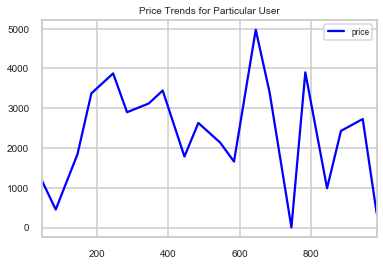

In [56]:
max_user_id = df.user_id.value_counts().index[0]
df[df.user_id == max_user_id][['price']].plot(style='blue')
plt.title('Price Trends for Particular User')
plt.show()

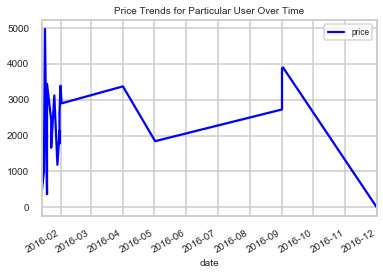

In [57]:
df[df.user_id == max_user_id].plot(x='date',y='price',style='blue')   
plt.title('Price Trends for Particular User Over Time')
plt.show()

### Bar plot

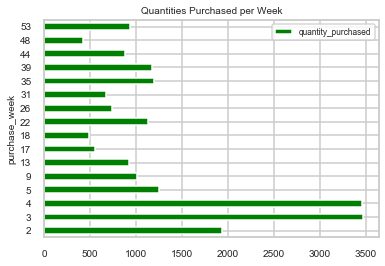

In [60]:
df[['purchase_week',
    'quantity_purchased']].groupby('purchase_week').sum().plot.barh(
                                                            color='green')
plt.title('Quantities Purchased per Week')
plt.show()

### Histograms

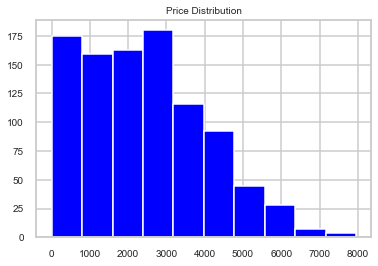

In [62]:
df.price.hist(color='blue')
plt.title('Price Distribution')
plt.show()

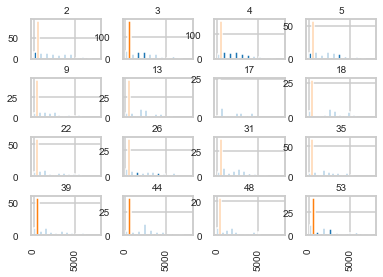

In [63]:
df[['price','purchase_week']].hist(by='purchase_week',sharex=True)
#plt.title('Price Distribution per Week')
plt.show()

### Pie Chart

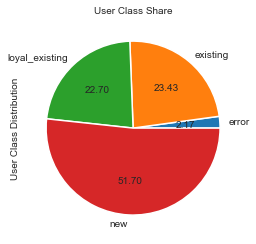

In [64]:
class_series = df.groupby('user_class').size()
class_series.name = 'User Class Distribution'
class_series.plot.pie(autopct='%.2f')
plt.title('User Class Share')
plt.show()

### Box Plot

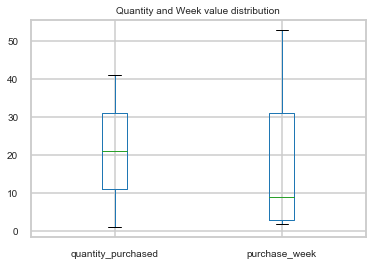

In [65]:
df[['quantity_purchased','purchase_week']].plot.box()
plt.title('Quantity and Week value distribution')
plt.show()

### Bubble Charts

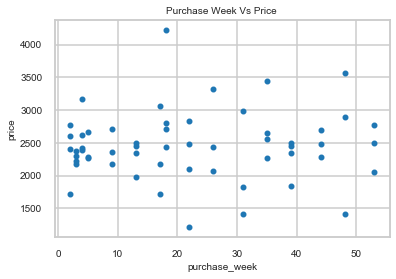

In [66]:
# bubble
uclass_map = {'new': 1, 'existing': 2, 'loyal_existing': 3,'error':0}
df['enc_uclass'] = df.user_class.map(uclass_map) 
bubble_df = df[['enc_uclass',
                'purchase_week',
                'price','product_id']].groupby(['purchase_week',
                                                'enc_uclass']).agg({'price':'mean',
                                                                    'product_id':'count'}).reset_index()
bubble_df.rename(columns={'product_id':'total_transactions'},inplace=True)


bubble_df.plot.scatter(x='purchase_week',
                       y='price')
plt.title('Purchase Week Vs Price ')
plt.show() 

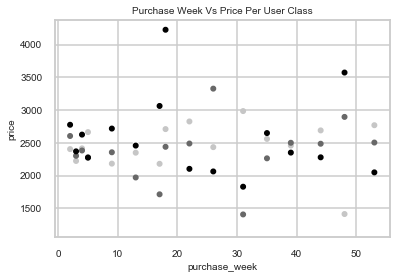

In [67]:
bubble_df.plot.scatter(x='purchase_week',
                       y='price',
                       c=bubble_df['enc_uclass']) 
plt.title('Purchase Week Vs Price Per User Class')                       
plt.show() 

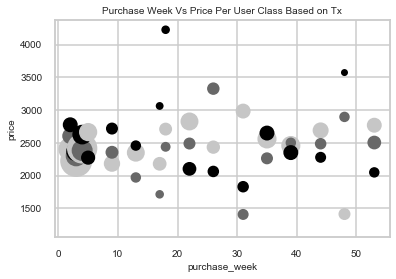

In [68]:
bubble_df.plot.scatter(x='purchase_week',
                       y='price',
                       c=bubble_df['enc_uclass'],
                       s=bubble_df['total_transactions']*10)
plt.title('Purchase Week Vs Price Per User Class Based on Tx')                          
plt.show()

## Figures and Subplots
+ This notebook showcases visualizations using matplotlib

In [69]:
# import required libraries
import numpy as np
import matplotlib.pyplot as plt

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}

plt.rcParams.update(params)
%matplotlib inline

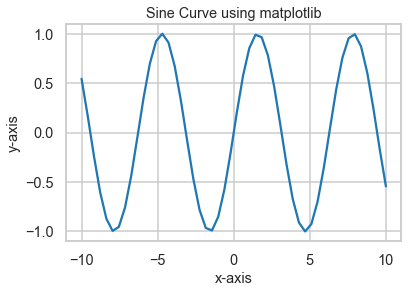

In [70]:
# sample plot
x = np.linspace(-10, 10, 50)
y=np.sin(x)

plt.plot(x,y)
plt.title('Sine Curve using matplotlib')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.show()

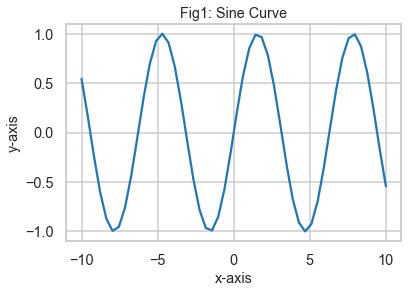

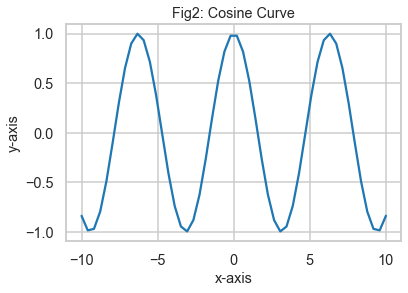

In [71]:
# first figure
plt.figure(1)
plt.plot(x,y)
plt.title('Fig1: Sine Curve')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.show()

plt.figure(2)
y=np.cos(x)
plt.plot(x,y)
plt.title('Fig2: Cosine Curve')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.show()

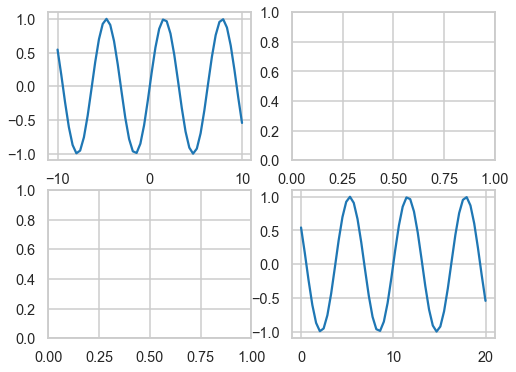

In [72]:
# fig.add_subplot
y = np.sin(x)
figure_obj = plt.figure(figsize=(8, 6))
ax1 = figure_obj.add_subplot(2,2,1)
ax1.plot(x,y)

ax2 = figure_obj.add_subplot(2,2,2)
ax3 = figure_obj.add_subplot(2,2,3)

ax4 = figure_obj.add_subplot(2,2,4)
ax4.plot(x+10,y)
plt.show()

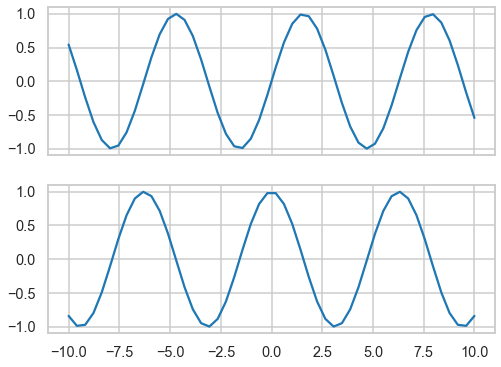

In [73]:
# plt.subplots
fig, ax_list = plt.subplots(2,1,sharex=True, figsize=(8, 6))
y= np.sin(x)
ax_list[0].plot(x,y)

y= np.cos(x)
ax_list[1].plot(x,y)
plt.show()

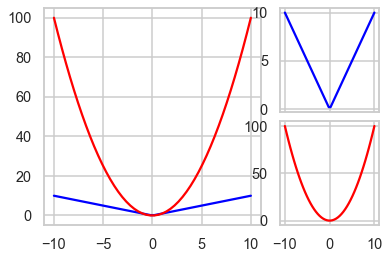

In [74]:
# subplot2grid
y = np.abs(x)
z = x**2

plt.subplot2grid((4,3), (0, 0), rowspan=4, colspan=2)
plt.plot(x, y,'b',x,z,'r')

ax2 = plt.subplot2grid((4,3), (0, 2),rowspan=2)
plt.plot(x, y,'b')
plt.setp(ax2.get_xticklabels(), visible=False)

plt.subplot2grid((4,3), (2, 2), rowspan=2)
plt.plot(x, z,'r')

plt.show()

## Plot Formatting
+ Line Color
+ Line Style
+ Data Marker
+ Line Width
+ Alpha Level/Transparency
+ Shorthand notation

In [75]:
y = x

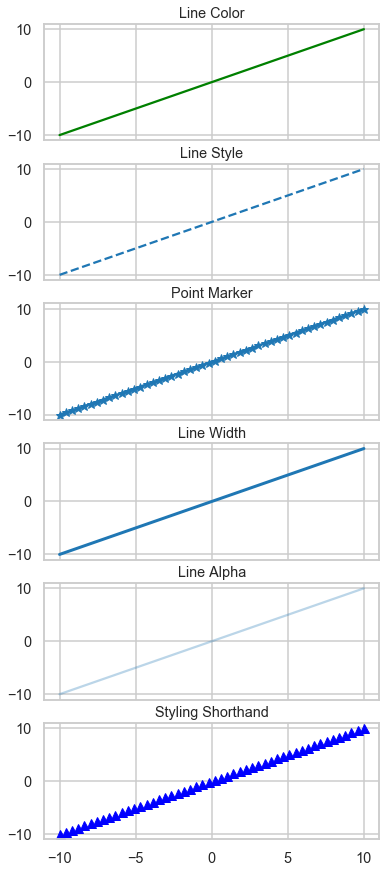

In [76]:
# color
ax1 = plt.subplot(611)
plt.plot(x,y,color='green')
ax1.set_title('Line Color')
plt.setp(ax1.get_xticklabels(), visible=False)

# linestyle
# linestyles -> '-','--','-.', ':', 'steps'
ax2 = plt.subplot(612,sharex=ax1)
plt.plot(x,y,linestyle='--')
ax2.set_title('Line Style')
plt.setp(ax2.get_xticklabels(), visible=False)

# marker
# markers -> '+', 'o', '*', 's', ',', '.', etc
ax3 = plt.subplot(613,sharex=ax1)
plt.plot(x,y,marker='*')
ax3.set_title('Point Marker')
plt.setp(ax3.get_xticklabels(), visible=False)

# line width
ax4 = plt.subplot(614,sharex=ax1)
line = plt.plot(x,y)
line[0].set_linewidth(3.0)
ax4.set_title('Line Width')
plt.setp(ax4.get_xticklabels(), visible=False)

# alpha
ax5 = plt.subplot(615,sharex=ax1)
alpha = plt.plot(x,y)
alpha[0].set_alpha(0.3)
ax5.set_title('Line Alpha')
plt.setp(ax5.get_xticklabels(), visible=False)

# combine linestyle
ax6 = plt.subplot(616,sharex=ax1)
plt.plot(x,y,'b^')
ax6.set_title('Styling Shorthand')

fig = plt.gcf()
fig.set_figheight(15)
plt.show()

## legends

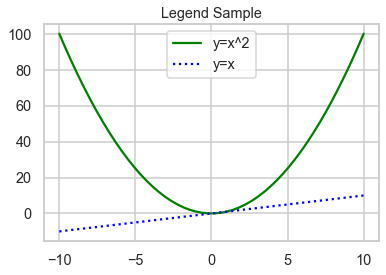

In [77]:
# legends
y = x**2
z = x

plt.plot(x,y,'g',label='y=x^2')
plt.plot(x,z,'b:',label='y=x')
plt.legend(loc="best")
plt.title('Legend Sample')
plt.show()

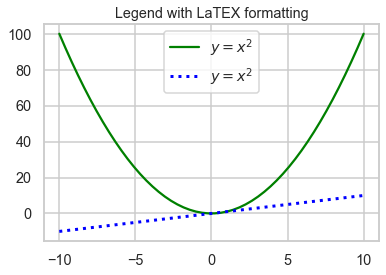

In [78]:
# legend with latex formatting
plt.plot(x,y,'g',label='$y = x^2$')
plt.plot(x,z,'b:',linewidth=3,label='$y = x^2$')
plt.legend(loc="best",fontsize='x-large')
plt.title('Legend with LaTEX formatting')
plt.show()

## Axis Controls

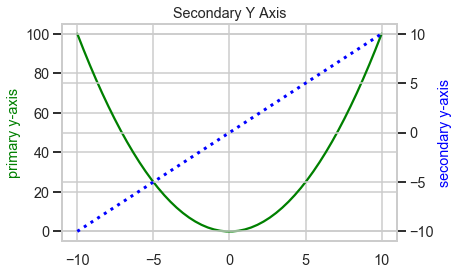

In [79]:
## axis controls
# secondary y-axis
fig, ax1 = plt.subplots()
ax1.plot(x,y,'g')
ax1.set_ylabel(r"primary y-axis", color="green")

ax2 = ax1.twinx()

ax2.plot(x,z,'b:',linewidth=3)
ax2.set_ylabel(r"secondary y-axis", color="blue")

plt.title('Secondary Y Axis')
plt.show()

C:\Users\INTEL\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  
C:\Users\INTEL\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log2
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\INTEL\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log10
  after removing the cwd from sys.path.


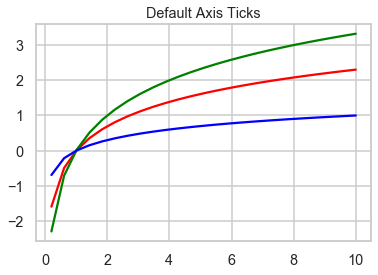

In [80]:
# ticks
y = np.log(x)
z = np.log2(x)
w = np.log10(x)

plt.plot(x,y,'r',x,z,'g',x,w,'b')
plt.title('Default Axis Ticks') 
plt.show() 

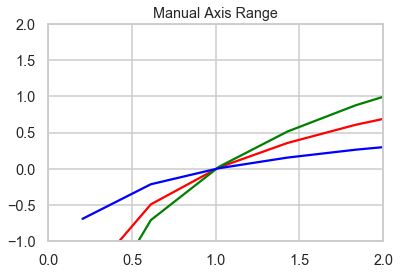

In [82]:
# manual
plt.plot(x,y,'r',x,z,'g',x,w,'b')
plt.axis([0,2,-1,2])
plt.title('Manual Axis Range') 
plt.show()

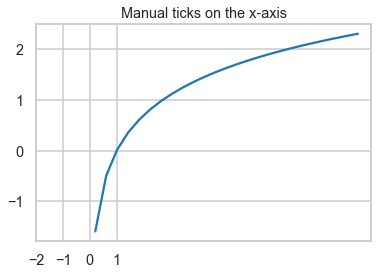

In [83]:
# Manual ticks      
plt.plot(x, y)
ax = plt.gca()
ax.xaxis.set_ticks(np.arange(-2, 2, 1))
plt.grid(True)
plt.title("Manual ticks on the x-axis")
plt.show()

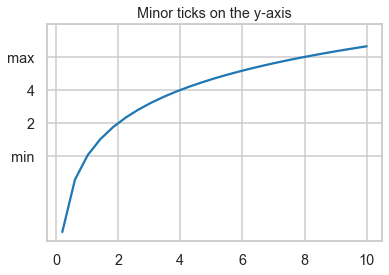

In [84]:
# minor ticks
plt.plot(x, z)
plt.minorticks_on()
ax = plt.gca()
ax.yaxis.set_ticks(np.arange(0, 5))
ax.yaxis.set_ticklabels(["min", 2, 4, "max"])
plt.title("Minor ticks on the y-axis")   
plt.show()

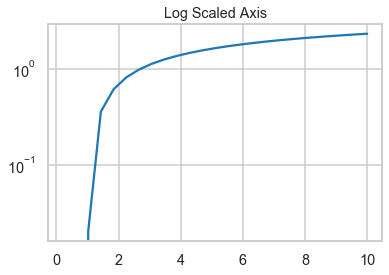

In [85]:
# scaling
plt.plot(x, y)
ax = plt.gca()
# values: log, logit, symlog
ax.set_yscale("log")
plt.grid(True)
plt.title("Log Scaled Axis")
plt.show()

## Annotations

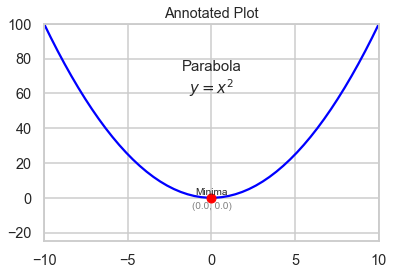

In [86]:
# annotations
y = x**2
min_x = 0
min_y = min_x**2

plt.plot(x, y, "b-", min_x, min_y, "ro")
plt.axis([-10,10,-25,100])

plt.text(0, 60, "Parabola\n$y = x^2$", fontsize=15, ha="center")
plt.text(min_x, min_y+2, "Minima", ha="center")
plt.text(min_x, min_y-6, "(%0.1f, %0.1f)"%(min_x, min_y), ha='center',color='gray')
plt.title("Annotated Plot")
plt.show()

In [87]:
# global formatting params
params = {'legend.fontsize': 'large',
'figure.figsize': (10, 10),
'axes.labelsize': 'large',
'axes.titlesize':'large',
'xtick.labelsize':'large',
'ytick.labelsize':'large'}
plt.rcParams.update(params)